In [47]:
import pandas as pd
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler # para padronizar dados


In [48]:
resultado_exames = pd.read_csv('data/exames.csv')

In [49]:
resultado_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [50]:
valores_exames = resultado_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultado_exames.diagnostico

In [51]:
resultado_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [52]:
valores_exames_v1 = valores_exames.drop(columns='exame_33')

In [53]:
SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

In [54]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
print("Resultado da CLassificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))

Resultado da CLassificação 92.40%


In [55]:
# Classificador que chuta um único valor para vrificar quanto ele acerta.
classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da CLassificação boba %.2f%%" %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da CLassificação boba 66.67%


In [57]:
# Fazendo a padronização dos dados para melhorar a visualização dos plots
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 # a saída é um numpy, mas estamos trabalhando com um dataframe

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [58]:
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames_v1.keys())

In [59]:
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515
1,M,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392
2,M,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685
3,M,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383
4,M,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560
...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,1.421085e-14,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589
565,M,1.704854,2.085134,1.615931,1.421085e-14,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664
566,M,0.702284,2.045574,0.672676,1.421085e-14,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117
567,M,1.838341,2.336457,1.982524,1.421085e-14,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194


In [60]:
dados_plot = pd.melt(dados_plot, id_vars = "diagnostico", var_name = "exames", value_name = "valores")
dados_plot

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297
...,...,...,...
5685,M,exame_10,-0.312589
5686,M,exame_10,-0.217664
5687,M,exame_10,-0.809117
5688,M,exame_10,2.137194


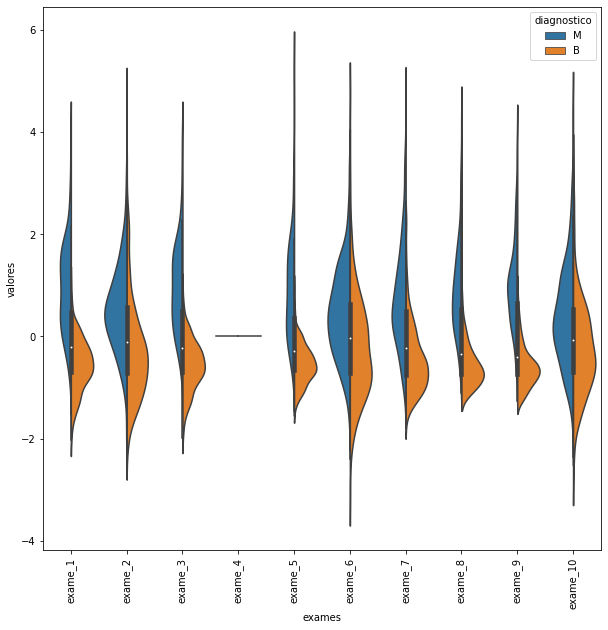

In [64]:
plt.figure(figsize=(10,10))

sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split=True)
plt.xticks(rotation = 90)
plt.show()

- Se a crista da onda azul está distante da crista da onda laranja, é um bom indicador de que o exame em questão serve para diferenciar se o diagnóstico é Maligno ou Benigno.
- O exame_4, no exemplo acima, não muda. Seus valores são constantes.
    - Eliminar a variável que é constante, pois ela não agrega em nada (exemplo: porcos e cachorros tem 4 patas (1), entao nao consigo identificar apenas com essa informação)

In [66]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars = "diagnostico", var_name = "exames", value_name = "valores")

    plt.figure(figsize=(10,10))
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split=True)
    plt.xticks(rotation = 90)
    plt.show()

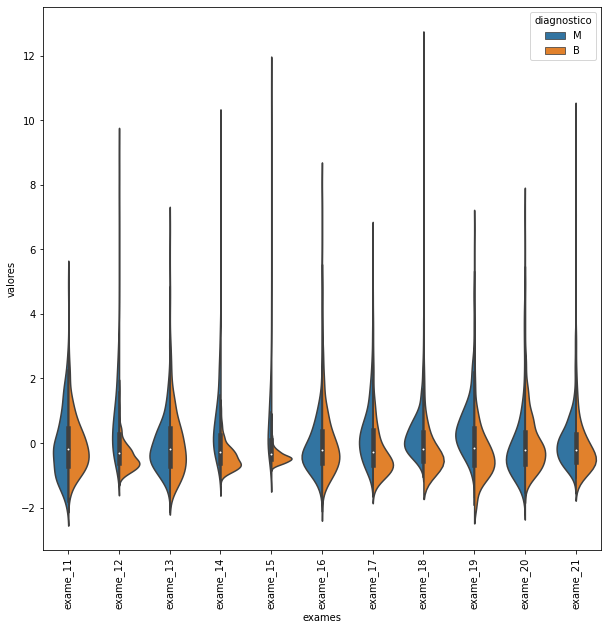

In [67]:
grafico_violino(valores_exames_v2, 10, 21)

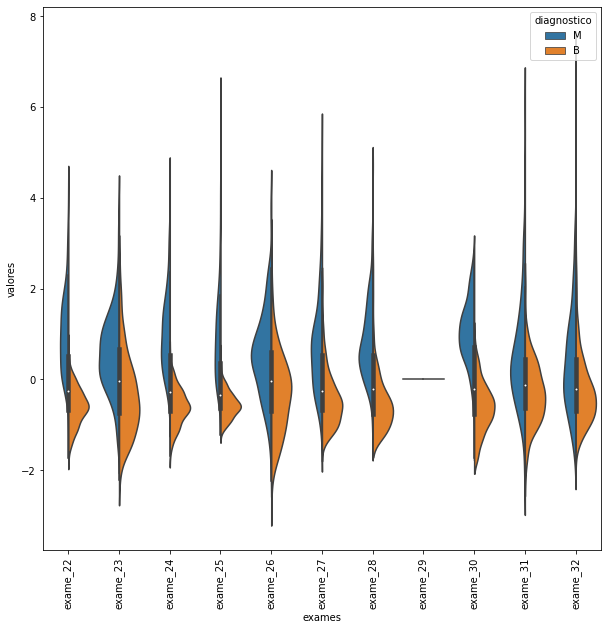

In [68]:
grafico_violino(valores_exames_v2, 21, 32)

In [70]:
# removendo as colunas com valores constantes
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29']) # reduzimos 2 dimensões até aqui.

In [71]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da CLassificação %.2f%%" %(classificador.score(teste_x, teste_y)*100))

In [72]:
classificar(valores_exames_v3)

Resultado da CLassificação 92.98%
